In [28]:
#Import the necessary libraries
import json
import pandas as pd
import matplotlib.pyplot as plt
import re
from IPython.display import display
%matplotlib inline
import numpy as np
from bs4 import BeautifulSoup

#This line filter Twitter Streams to capture data by the keywords: 
track=['nike','adidas','converse','air jordan','vans','reebok','puma',
       'new balance','vlado','asics','supra','champion','fila','diesel',
       'sketchers','keds','under armour']

In [29]:
#Reading Tweets
#print ('Reading Tweets\n')
tweets_data_path = 'twitter_data.txt'
#print(tweets_data_path)

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue


In [30]:
print(len( tweets_data))  
    

8903


In [32]:
#Structuring Tweets
#print ('Structuring Tweets\n')

def clean_tweet(tweet):
    '''
    Utility function to clean the text in a tweet by removing 
    links and special characters using regex.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())

tweets = pd.DataFrame()
tweets['len']  = np.array([len(tweet['text']) for tweet in tweets_data])
tweets['links'] = list(map(lambda tweet: tweet['source'], tweets_data))
tweets['text'] = list(map(lambda tweet: clean_tweet(tweet['text']), tweets_data))
tweets['lang'] = list(map(lambda tweet: tweet['lang'], tweets_data))
tweets['country'] = list(map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data))

# We obtain all possible sources:
links =[]
# We print sources list:
for source in tweets['links']:
    #print("{}".format(source))
    soup = BeautifulSoup(source, 'lxml')
    for anchor in soup.find_all('a'):
        #print (anchor.text)
        links.append(anchor.text)
#print(links) 

column_values = pd.Series(links)
tweets.insert(loc=0, column='source', value=column_values)

In [33]:
display(tweets.head(5))

,source,len,links,text,lang,country
0,Twitter for Android,133,"<a href=""http://twitter.com/download/android"" ...",RT Puma Announces Partnership With World Renow...,en,None
1,Twitter for iPhone,100,"<a href=""http://twitter.com/download/iphone"" r...",when you have to be at the nike office in 10 m...,en,None
2,Twitter for Android,140,"<a href=""http://twitter.com/download/android"" ...",RT Oh wait did I mention that Stormy was recru...,en,None
3,Twitter for iPhone,89,"<a href=""http://twitter.com/download/iphone"" r...",RT This DC teacher has buried 13 students in 7...,en,None
4,Twitter Web Client,140,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT 2018 19 Kit Concepts RT if you like any of ...,en,None


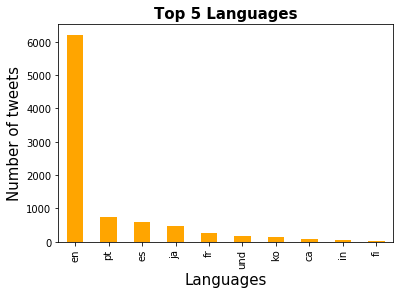

In [10]:
tweets_by_lang = tweets['lang'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 Languages', fontsize=15, fontweight='bold')
tweets_by_lang[:10].plot(ax=ax, kind='bar', color='orange')

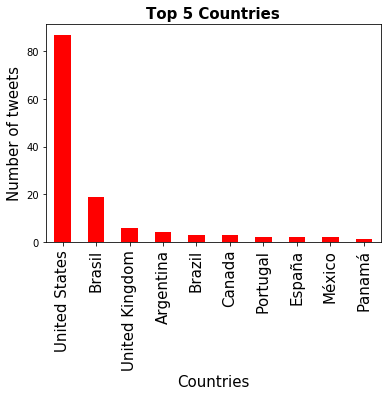

In [35]:
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 Countries', fontsize=15, fontweight='bold')
tweets_by_country[:10].plot(ax=ax, kind='bar', color='red')

### Sentiment Analysis of the tweets

In [8]:
from textblob import TextBlob
for index, row in tweets.iterrows():
    temp = TextBlob(row['text'])
    tweets.loc[index,'sentscore'] = temp.sentiment.polarity
    if temp.sentiment.polarity > 0:
            print('Sentiment classification: positive:')
            print('Tweet: ', temp)
            print('Sentiment (Polarity and Subjectivity: ', temp.sentiment)
            print('\n ')
    elif temp.sentiment.polarity == 0:
            print('Sentiment classification: neutral: ')
            print('Tweet: ', temp)
            print('Sentiment (Polarity and Subjectivity: ',  temp.sentiment)
            print('\n ')
    else:
        print('Sentiment classification: negative:') 
        print('Tweet: ', temp)
        print('Sentiment (Polarity and Subjectivity: ',  temp.sentiment)
        print('\n ')

Sentiment classification: neutral: 
Tweet:  RT Puma Announces Partnership With World Renowned Pop Music Icons BTS
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  when you have to be at the nike office in 10 mins and you re in williamsburg
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Oh wait did I mention that Stormy was recruited to run against David Vitter who got busted in the DC Madam prostitution sc
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT This DC teacher has buried 13 students in 7 years
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT 2018 19 Kit Concepts RT if you like any of them MUFC ManUtd Adidas Kit Template by
Sentiment (Polarity and Subjecti

Sentiment classification: neutral: 
Tweet:  RT Boys Nike Air Force 1 Low LV8 now in stores online
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.3)

 
Sentiment classification: neutral: 
Tweet:  RT Phoulo Rassurez moi suis je le seul a avoir toujours lu cette marque FILS au lieu de FILA
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT vai faz a fila vem uma de cada vez
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT I d say at least one million people in the streets of DC Historic This photo doesn t even show the full breadth of it Thank
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.016666666666666663, subjectivity=0.3166666666666667)

 
Sentiment classification: neutral: 
Tweet:  RT delite message pour une Am lie si ton copain est brun 1m80 avec une paire de fila et a pris le bu

Sentiment classification: negative:
Tweet:  RT Inside the Shadow President s DC Kalorama 8 200 square foot 8 1 Million mansion eight bedrooms nine and a half bathro
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.16666666666666666, subjectivity=0.16666666666666666)

 
Sentiment classification: positive:
Tweet:  RT This is yet another young man who attended DC s MarchForOurLives This is also Trump s Son in law Jared Kusher s younge
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1, subjectivity=0.4)

 
Sentiment classification: neutral: 
Tweet:  RT delite message pour une Am lie si ton copain est brun 1m80 avec une paire de fila et a pris le bus 241 pour aller porte d a
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  nike air max 1 97 sean wotherspoon size 10 5 ORDER CONFIRMED via SNKRS APP
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4, subjectivity=1.0)

 
Sentiment 

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  N o viste que a minha provadora Nike logo a app diferente olha p rede l em cima
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  la gente c mo mantiene las vans tan impecables si yo las tengo hace menos de 3 meses y ya est n llenas de mierda
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  O transporte p blico de Floripa tinha que ter nibus pq uma hora na fila eu n o consigo aguentar os 2 litros de g
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  8
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT ALERTARATA hay zapatillas de muchas marcas Adidas


 
Sentiment classification: neutral: 
Tweet:  RT palmeiras Palmeiras se anima com projeto da Puma para expans o da marca Via palmeiras
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT AC DC 1978
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  demoro perdeu a fila n o anda ela voa
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT The first flashes of a real grassroots movement don t happen in DC They happen on the front pages of local newspapers By
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.15, subjectivity=0.2111111111111111)

 
Sentiment classification: positive:
Tweet:  RT This is yet another young man who attended DC s MarchForOurLives This is also Trump s Son in law Jared Kusher s younge
Sentiment (Polarity and Subjectivity: 

Sentiment classification: neutral: 
Tweet:  RT Ex Parking in DC and NY will have you getting out the car like
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT ICHH had to decommission one of our outreach vans today after years of service to the charity and we have started an onli
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  SNKRS411 Nike Air Max Plus Sees Shark Attack Inspiration
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Halts maul du bonze ich wollte seit 3 Jahren Vans und konnte sie mir erst gestern bestellen
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT This is a reading comic Con not just a looking at pictures comic Con Come on out UK
Sentiment (Polari

Tweet:  RT Being a champion for immigrant youth today means to defund the agencies that separate families everyday Thank you
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.2, subjectivity=0.6)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT ALERT Leftist are trying to get police officer Martin Palla fired for a peaceful protest in DC of his 2nd Amend rights Pl
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.06666666666666667, subjectivity=0.3666666666666667)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Hey it s Nike Air Max day and it s also my birthday can you hook me up with

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT Powerful moment at MarchForOurLives in DC the other day Sends chills down my spine and hope in my heart every time I
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.006481481481481467, subjectivity=0.5546296296296297)

 
Sentiment classification: neutral: 
Tweet:  24
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  PUMA Turin Men s Sneakers pumasneakers menssneakersstyle
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  Blasco13 Jollett Read Brown vs BOE Separate but equal isn t a great thing Also the idea th
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4, subjectivity=0.5)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarit


 
Sentiment classification: neutral: 
Tweet:  Adem s de la semblanza de Garc a L pez tambi n compil una galer a con m s de cincuenta ejemplos de su trabajo m s
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Fila do cinema eu vou estar como NadaAPerder NAPSP NAPSPLitoral
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT puma x jimin is always the most beautiful concept
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.675, subjectivity=0.75)

 
Sentiment classification: positive:
Tweet:  RT UCF QB commit was very impressive at Under Armour Camp Orlando Sunday Natural passer with good feet amp mobility
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.6, subjectivity=0.6666666666666666)

 
Sentiment classification: neutral: 
Tweet:  RT vai faz a fila e vem uma de cada vez
Sentiment (Polarity and Subjectivity

Sentiment classification: neutral: 
Tweet:  RT When I was younger I always wanted to be the 1st Filipino IC Champion it s still a personal goal of mine FilAmFlash Cru
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.15)

 
Sentiment classification: negative:
Tweet:  RT club Carnists Vegans are so extreme Also carnists
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.125, subjectivity=1.0)

 
Sentiment classification: neutral: 
Tweet:  Detective Comics 351 May 1966 DC
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT I hated every minute of training but I said don t quit Suffer now and live the rest of your life as a champion
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.38181818181818183, subjectivity=0.6)

 
Sentiment classification: neutral: 
Tweet:  Detective Comics 351 May 1966 DC
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subj

Tweet:  RT Robert Kraft left a letter for the Parkland families who took the Patriots team plane to DC for the March for Our Lives via
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Going to buy SUPREME YEEZY BAPE NMD AIR JORDAN ASSC KITH Text me for sneakerbots
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  sponsor me
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT talked to Ted Olson one of DC s top Republican lawyers who Trump recently tried to recruit unsuccessfully A
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.375)

 
Sentiment classification: positive:
Tweet:  RT Great point from Everyone should learn to code It s the new language of the digital age learn to converse in it
Sentiment (Polarity and Subjecti

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  Baseball just became less fun
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.06666666666666667, subjectivity=0.13333333333333333)

 
Sentiment classification: neutral: 
Tweet:  Philadelphia NYC Boston Chicago Detroit LA DC Baltimore USA America Georgia s version of the NAACP an
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  s o Nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT the crowd in DC singing happy birthday Nick who would have turned 18 today
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.8, subjectivity=1.0)

 
Sentiment classification: positive:
Tweet:  RT This is yet another young man who attended DC s MarchForOurLives This is also Trump s Son in law Jared Kus


 
Sentiment classification: positive:
Tweet:  Yeah I m seeing it shared While it is positive I don t like that he s declaring them gone already T
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.22727272727272727, subjectivity=0.5454545454545454)

 
Sentiment classification: positive:
Tweet:  change Twitter Moment He s more than Kanye West collaborator he has a master in architectu
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.5, subjectivity=0.5)

 
Sentiment classification: negative:
Tweet:  Both parties are about as dead as can be The two party political system is broke truth is that are
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.1, subjectivity=0.25)

 
Sentiment classification: positive:
Tweet:  I thought you were amazing at the DC roast I laughed until it hurt I was genuinely surprised at how
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.46666666666666673, subjectivity=0.6666666666666666)

 
Sentiment classification: neutr

Sentiment classification: neutral: 
Tweet:  RT Make your voice heard it only takes 15 seconds
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=1.0)

 
Sentiment classification: negative:
Tweet:  RT y all are weird
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.5, subjectivity=1.0)

 
Sentiment classification: neutral: 
Tweet:  RT Ex Parking in DC and NY will have you getting out the car like
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT talked to Ted Olson one of DC s top Republican lawyers who Trump recently tried to recruit unsuccessfully A
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.375)

 
Sentiment classification: positive:
Tweet:  RT talked to Ted Olson one of DC s top Republican lawyers who Trump recently tried to recruit unsuccessfully A
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.375)

Tweet:  I NEED ASAP Fuck Dem Regular Joints I Buy Dem Every Year Dese A CLASSIC
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.07777777777777779, subjectivity=0.2811965811965812)

 
Sentiment classification: neutral: 
Tweet:  RT NIKE AIR VAPORMAX OFF WHITE AA3831 002 Sports Lab by atmos 30
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Doubt asap rocky would wear fila shoes that yer son wore in year 4 tho
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT In Washington DC yesterday before MarchForOurLives we hosted what likely was the largest VoterRegistration training of
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=1.0)

 
Sentiment classification: neutral: 
Tweet:  If I was there deadass I would legit be like her ass
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, su

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.25, subjectivity=0.5333333333333333)

 
Sentiment classification: negative:
Tweet:  when are the LeBron XV hitting NikeID I need to customize a few pair
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.2, subjectivity=0.1)

 
Sentiment classification: positive:
Tweet:  is there any point to the mesh on the Deerupt or is it purely a design gimmick
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.21428571428571427, subjectivity=0.5)

 
Sentiment classification: neutral: 
Tweet:  woahhhhh needs these
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  This speaks volumes this is from an upstanding lawyer which shows what a dreadful awful human being Trump is that n
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.6666666666666666, subjectivity=0.7000000000000001)

 
Sentiment classification: neutral: 
Tweet:  25 20 4 47


 
Sentiment classification: negative:
Tweet:  Suspicious Packages Found at Several Military Installations in D C Area
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: neutral: 
Tweet:  RT
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Alice01 RT adidas CANMAKE 3 5 4 12 DM
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT The first flashes of a real grassroots movement don t happen in DC They happen on the front pages of local newspapers By
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.15, subjectivity=0.2111111111111111)

 
Sentiment classification: neutral: 
Tweet:  RT 180326 PUMA twt in reklam ekimlerinden sahne arkas g r nt leri yay nlad
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classificatio

Sentiment classification: positive:
Tweet:  RT He was so concentrated Never mind We love you and you are our champion EXO
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.5, subjectivity=0.6)

 
Sentiment classification: neutral: 
Tweet:  RT For next person to say But DC is the norm in the private sector I came to academia to NOT be in private sector I
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.25)

 
Sentiment classification: positive:
Tweet:  RT puma x jimin is always the most beautiful concept
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.675, subjectivity=0.75)

 
Sentiment classification: positive:
Tweet:  RT Ya tienes el DC DELUXE con The Dark Knight Returns y DK2 Strike Again
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.22499999999999998, subjectivity=0.65)

 
Sentiment classification: positive:
Tweet:  RT Lovin amp S Real Sister Synchro Dance Performance Unit idol Lovin amp S Ayu NEW Info July 22 S
Senti

Tweet:  RT Ex Parking in DC and NY will have you getting out the car like
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  La primera parte es hermosa termina como el ojete y no entendes bien pero esta buena el otro arco
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT TAMI LAHREN why are these teens on spring break in Washington DC they shouldn t be skipping school to promote partisan
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT RM PUMA TURIN MADE BY BTS
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT No hay fila este d a L nzate al Parque Quer taro 2000 por tu cortes a para el QueretaroMarat n o para la carrera Intra
Sentiment (Polarity and Subjectivity:  Sent

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Ex Parking in DC and NY will have you getting out the car like
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Si os molesta que hagamos tt los d as que se organizan y los que no tambi n poneros en fila para comerme el potorro Adelan
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT PUMA TURIN Behind The Scenes taehyung cut BTS twt
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.7)

 
Sentiment classification: neutral: 
Tweet:  TOZZ a lui apprendra fr quenter des merdes dans ce genre Ils n ont aucune ducation ils croient rentre
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Alo demorou 


 
Sentiment classification: neutral: 
Tweet:  RT Robert Kraft left a letter for the Parkland families who took the Patriots team plane to DC for the March for Our Lives via
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  Mr Wayne said ya ll like nike and adidas right LMAO let s get to the coin
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.44285714285714284, subjectivity=0.7678571428571428)

 
Sentiment classification: neutral: 
Tweet:  RT Usted ya inscribi su c dula Recuerde que hasta ma ana 27 de marzo tiene plazo para hacer el tr mite
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Air Jordan 7 Lows rumored for summer
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Batman 2016 24 VF NM 2nd Printing Cover Catwoman Proposal DC Rebir

Sentiment classification: neutral: 
Tweet:  RT D aten o reciprocidade e amor que ela merece o vans ela compra
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Mark Kelly and Gabrielle Giffords asked Robert Kraft to donate the Patriots plane for Parkland victims to get to DC for
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT PUMA TURIN Behind The Scenes taehyung cut BTS twt
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.7)

 
Sentiment classification: neutral: 
Tweet:  RT Stormy weather at the White House today even though it s sunny in DC
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT World Curling TV UNCUT interview with s WWCC2018 champion skip Jennifer Jones
Sentiment (Polarity and Subjectivity:  Sentiment

Tweet:  RT TAMI LAHREN why are these teens on spring break in Washington DC they shouldn t be skipping school to promote partisan
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT NEW VIDEO I went to DC for March for our lives
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)

 
Sentiment classification: positive:
Tweet:  RT Aramayo 10 Ways to Use DesignThinking for Driving Business The most successful companies like AirBnB Nike Pepsi Google
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.625, subjectivity=0.725)

 
Sentiment classification: neutral: 
Tweet:  I might have to upgrade to these
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT Sounds like the seniors had a great time in DC They are safely back in CT Thanks to all the chaperones who helped 

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT gbabyyyy OH FUCK
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.6)

 
Sentiment classification: neutral: 
Tweet:  RT Alright fambloskis now s your chance to see if you ve got faster feet than me Take s FastestFeet Challenge fo
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT 3 million workers in the EU are exposed to diesel fumes beyond safe levels in their workplace Tomorrow we will be sta
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.5, subjectivity=0.5)

 
Sentiment classification: negative:
Tweet:  RT game Concepts x Asics Gel Lyte III 25th Anniversary 2015
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.4)

 
Sentiment classification: neutral: 
Tweet:  RT Adidas Deerupt Runner
Sentiment (Polarity


 
Sentiment classification: neutral: 
Tweet:  Nike Lebron IV 4 SVSM Sz 13 promo sample pe player exclusive unreleased ctk
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  I m not just a regular civilian I ride for the squad I m a champion
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.07692307692307693)

 
Sentiment classification: neutral: 
Tweet:  RT Qui n es el coordinador electoral de la MUD Vicente Bello ex mano derecha de Jorgito Qui n es el representante de la MU
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Caralho como algu m ainda pode ter hype num filme da DC
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Cuando taxistas vuelvan a bloquear y se den golpes de pecho exigiendo respeto a la ley mu strenle sta 

Sentiment classification: neutral: 
Tweet:  RT Se ja usavas Vans a muito tempo mano ningu m quer saber n s vamos usar pq voltou na moda e Ta kuyar
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT This is such a lovely gesture from Robert Kraft This isn t just the students the majority of your country feels the sam
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.625)

 
Sentiment classification: positive:
Tweet:  RT One more Pennsylvania Republican Rep Ryan Costello tells MSNBC he will withdraw from his congressional race this week a
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.5, subjectivity=0.5)

 
Sentiment classification: positive:
Tweet:  RT ALERT Leftist are trying to get police officer Martin Palla fired for a peaceful protest in DC of his 2nd Amend rights Pl
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.06666666666666667, subjectivity=0.3

Tweet:  RT Hmmmm A Hogg amp a PROG Or two PROGS Content w Swamp LIVING FakeNews freely GIVING Mired in DC skanky BOGS h
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4, subjectivity=0.8)

 
Sentiment classification: neutral: 
Tweet:  RT llach Estimats JordiC JordiS Oriol Quim JosepR Dolors Carme Ra l JordiT Carles Meritxell Toni Clara Llu s Anna i M
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT Happy AirMaxDay AirMax
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.8, subjectivity=1.0)

 
Sentiment classification: positive:
Tweet:  RT BREAKING Multiple agencies in the DC area reported receiving suspicious packages at their locations All deemed safe
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.25)

 
Sentiment classification: neutral: 
Tweet:  Fila disruption II
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 


Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Everson DoJ attorneys for in his official capacity submitted a statement of interest in the DC and MD AGs emolumen
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  No they bomb concerts and ram vans into crowds
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT Virgil Abloh has been named Louis Vuitton s first African American artistic director of Menswear He went from designing al
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.14583333333333331, subjectivity=0.3333333333333333)

 
Sentiment classification: positive:
Tweet:  RT talked to Ted Olson one of DC s top Republican lawyers who Trump recently tried to recruit unsuccessfully A
Sentiment (Polarity and Subjectivity:  Sentiment(polari


 
Sentiment classification: neutral: 
Tweet:  RT me jungkook stealing glances in the puma video
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT all hail chanyeol s adidas trackpants
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT I m from Florida and can say unequivocally the is a living piece of self serving Garbage
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Vintage Nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT PUMA BOG SOCK ISSUE 2
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sent

Sentiment classification: neutral: 
Tweet:  Nike Air Max 97 Gym Red release on 04 01 2018 for 160 via KoFapp
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT rosqvist ADIDAS
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  VITA AFTER OFFICE mi rcoles Hernan amp la Champion Liga en Vivo Estos son los
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  OL
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT talked to Ted Olson one of DC s top Republican lawyers who Trump recently tried to recruit unsuccessfully A
Sentiment (Polarity and Subjectivity:  

Tweet:  RT Automation Start off the week right with Maryland Performance Diesel and their Haas VF 4SS working hard at these billet 6 7 int
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.0029761904761904934, subjectivity=0.5386904761904762)

 
Sentiment classification: positive:
Tweet:  Lowest Ask 100 Jordan 1 Retro High Yin Yang White GS Sz 5 5Y airjordan
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.08, subjectivity=0.26999999999999996)

 
Sentiment classification: neutral: 
Tweet:  RT mo Momo quel est ton sylte de meuf toutes celle qui nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT FODA SE QUE BONITO
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Preto da nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  Gre

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT JOU remember how I said home ed is being set up 4 a fall My double whammies 3 27 will show from birth to 8
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT guys umm we NEED to vote for Stray kids on the show champion idol champion app They re nominated but are at 0 0 in vot
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT ALERT Leftist are trying to get police officer Martin Palla fired for a peaceful protest in DC of his 2nd Amend rights Pl
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.06666666666666667, subjectivity=0.3666666666666667)

 
Sentiment classification: negative:
Tweet:  black and white checkered slip on vans are for thots
Sentiment (Polarity and Subjectivity:  Sentimen


 
Sentiment classification: positive:
Tweet:  RT talked to Ted Olson one of DC s top Republican lawyers who Trump recently tried to recruit unsuccessfully A
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.375)

 
Sentiment classification: positive:
Tweet:  Well thought out reasonable thinking imagine that
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.2, subjectivity=0.6)

 
Sentiment classification: positive:
Tweet:  RT Be confident Be expressive The all new studio range Available NOW at
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4590909090909091, subjectivity=0.671969696969697)

 
Sentiment classification: neutral: 
Tweet:  RT Back to the Future Part II 1989 de Robert Zemeckis Nike queremos esto Vagos
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0625)

 
Sentiment classification: positive:
Tweet:  RT talked to Ted Olson one of DC s top Republican lawyers who Trump recently tried to recruit 

Sentiment classification: neutral: 
Tweet:  RT While 800 000 Americans converged on Washington DC and millions of others took part in local MarchForOurLives rallies Pr
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT deedee They really gonna keep building in DC until the whole lil ass square filled with something other than grass and free spac
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.21500000000000002, subjectivity=0.5349999999999999)

 
Sentiment classification: positive:
Tweet:  ok quindi quando torner a casa dal tour di harry depressa e povera per impoverirmi ancora di pi ma provare un bri
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.5, subjectivity=0.5)

 
Sentiment classification: positive:
Tweet:  RT This is yet another young man who attended DC s MarchForOurLives This is also Trump s Son in law Jared Kusher s younge
Sentiment (Polarity and Subjectivity:  Sentiment(

Tweet:  This deadass how it looked in DC this weekend
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT NEW VIDEO I went to DC for March for our lives
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)

 
Sentiment classification: positive:
Tweet:  RT It s almost time for the DC Publishers Panel Stream it LIVE from DCWonderCon
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.13636363636363635, subjectivity=0.5)

 
Sentiment classification: positive:
Tweet:  RT My wish for you is that this life becomes all that you want it to Watch LIVE americaneaglefoundation dceaglecam bal
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.13636363636363635, subjectivity=0.5)

 
Sentiment classification: neutral: 
Tweet:  RT D aten o reciprocidade e amor que ela merece o vans ela compra
Sentiment (Polarity and Subjectivity:  Sentiment(polari

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  Here Are A Few Of The Most Obnoxious Signs At The March For Our Lives Rally Dailycaller
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.15, subjectivity=0.3)

 
Sentiment classification: positive:
Tweet:  RT JUNGKOOK X PUMA PLAY WARM 2015 amp BLAZE TIME 2015 2016 just a quick clip to remember some of the oldest puma shoot
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4666666666666667, subjectivity=0.55)

 
Sentiment classification: positive:
Tweet:  RT I wish everyone could ve been there when they showed a live video shot straight down Pennsylvania Our jaws were on the
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.06026936026936026, subjectivity=0.3962962962962963)

 
Sentiment classification: neutral: 
Tweet:  RT me jungkook stealing glances in the puma video
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0


 
Sentiment classification: negative:
Tweet:  Common Kings feat Kat Dahlia Champion nowplaying listenlive
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.3, subjectivity=0.5)

 
Sentiment classification: neutral: 
Tweet:  teamshoes summer18 samsballers
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT guys umm we NEED to vote for Stray kids on the show champion idol champion app They re nominated but are at 0 0 in vot
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Hostia Holly Va a la fila
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  And he working on an exclusive Nike deal Breh
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT Get Ready
Sentiment (Pol

Sentiment classification: positive:
Tweet:  RT Happy 12th birthday to 2008 Champion 2YO amp Juvenile winner Midshipman
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.275, subjectivity=0.625)

 
Sentiment classification: positive:
Tweet:  Gostei de um v deo Online Is the NEW DLC Good How Rockstar NEEDS to Fix the Supra amp More GTA
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4454545454545455, subjectivity=0.5181818181818182)

 
Sentiment classification: positive:
Tweet:  RT Here it is 7 police vans a CCTV van 2 inspectors 20 30 police keeping our streets safe from a toy trumpet
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.5, subjectivity=0.5)

 
Sentiment classification: positive:
Tweet:  RT This is yet another young man who attended DC s MarchForOurLives This is also Trump s Son in law Jared Kusher s younge
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1, subjectivity=0.4)

 
Sentiment classification: neutral: 
Tweet:  RT rbcn d

Tweet:  RT Dudes will post a fit pic with some size 14 airmax 97s and some tight ass pants looking like they got whole mini vans on
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1404761904761905, subjectivity=0.36190476190476195)

 
Sentiment classification: positive:
Tweet:  RT This may be the first time I ve seen a news outlet ask a man how they balance work and home and I m living for it Thank
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.3333333333333333)

 
Sentiment classification: neutral: 
Tweet:  RT me jungkook stealing glances in the puma video
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT taetime BTS twt X PUMA TURIN Piano Cover Full Please listen to it on YouTube as audio is b
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.35, subjectivity=0.55)

 
Sentiment classification: negative:
Tweet:  RT poor sad UK not a shadow of the place

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Never Again Gonna post pics from DC on my tumblr
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT TAMI LAHREN why are these teens on spring break in Washington DC they shouldn t be skipping school to promote partisan
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Pra somar raro pra te afundar tem at fila
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT iwakeli i Delete Facebook and delete Mark Zuckerberg while you re at it
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  And and as well as getting buckets full of donations we gave out h


 
Sentiment classification: positive:
Tweet:  RT Sally is clear that she has not seen any change of heart by the employers I m glad SH is clear headed about this because
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.2333333333333333, subjectivity=0.5888888888888889)

 
Sentiment classification: neutral: 
Tweet:  that s my mom
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  I just liked Nike Air Max 270 Work in progress timelapse on Vimeo
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.6, subjectivity=0.8)

 
Sentiment classification: positive:
Tweet:  RT talked to Ted Olson one of DC s top Republican lawyers who Trump recently tried to recruit unsuccessfully A
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.375)

 
Sentiment classification: neutral: 
Tweet:  queria q essa fosse minha indecis o
Sentiment (Polarity and Subjectivity:  Sentiment(polarity

Sentiment classification: positive:
Tweet:  DC Universe Classics Tyr Action Figure
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1, subjectivity=0.1)

 
Sentiment classification: neutral: 
Tweet:  RT Allen Back2back collegiate groin kicking champion
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT The FBI has taken custody of multiple suspicious packages sent to military locations in the Washington DC area a law enf
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: positive:
Tweet:  RT The first flashes of a real grassroots movement don t happen in DC They happen on the front pages of local newspapers By
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.15, subjectivity=0.2111111111111111)

 
Sentiment classification: positive:
Tweet:  Dc Multiverse Justice League Armored Batman V Superman Aquaman Action Figure Lot
Sent

Tweet:  RT Three DC Women Arrested for Shoplifting Over 2 500 Worth of Items from St Charles Towne Center Mall Southern Maryland
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.06666666666666667, subjectivity=0.06666666666666667)

 
Sentiment classification: neutral: 
Tweet:  eu quero o moletom da puma x diamond
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Release Date Nike Air Max 97 CR7 Portugal Patchwork
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT The 1st match announcement will be our 1st women s match to crown our 1st PCW ULTRA WORLD WOMEN S CHAMPION Watch Chels
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Sub17 El Academy gan 1 0 ante y termina segundo en su grupo de la Generation Cup El el
Sentiment (Polarity and

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT Football One more opportunity tomorrow morning will decide the champion of our 2018 spring competition Standings after week
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.5, subjectivity=0.5)

 
Sentiment classification: neutral: 
Tweet:  RT Capitao nao da marvel
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Ex Parking in DC and NY will have you getting out the car like
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT finney As guria tudo postando namore algu m que te d pandora namore algu m que te d um vans e eu quando saio com algum meni
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT A huge deal 


 
Sentiment classification: negative:
Tweet:  RT Imagine a world where the same league that is blackballing black athletes for protest flies middle class white teens to
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.041666666666666664, subjectivity=0.13958333333333334)

 
Sentiment classification: neutral: 
Tweet:  RT Vintage Nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Se queda mirando la fila de alumnos de Holly Pobres almas
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT JUNGKOOK X PUMA PLAY WARM 2015 amp BLAZE TIME 2015 2016 just a quick clip to remember some of the oldest puma shoot
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4666666666666667, subjectivity=0.55)

 
Sentiment classification: positive:
Tweet:  RT NEW VIDEO I went to DC for March for our lives
Sentiment (Polarity and S

Sentiment classification: negative:
Tweet:  second I think it s a Snyder DC cultists because nobody could be that dumb
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.1875, subjectivity=0.25)

 
Sentiment classification: positive:
Tweet:  Batman The Return Of Scarface 1 2 3 Complete DC Comics Lot NM
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1, subjectivity=0.4)

 
Sentiment classification: neutral: 
Tweet:  RT Penny said he s meeting with Nike during Final Four to discuss the stuff Nike gonna do exclusively for Tigers
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=1.0)

 
Sentiment classification: neutral: 
Tweet:  RT Cabeyo97 Lauren Jauregui passou na fila da beleza umas 52628995 vezes prq poss vel uma mulher ser t o linda desse jeito
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  Favorite pair of shoes My black converse
Sentiment (Polarity and S

Tweet:  RT Vintage Nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT One thing they d all say is that they meant the Republic to stay out of the hands of theocratic grifters like you http
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT jp
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Vintage Nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT HOOEY IS DEAD HE DIDNT WIN SHIT YOU PSYCHOTIC BITCH how dare you That poor baby deserved way more of a life than for
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=9.25185853854297e-18, subjectivity=0.6166666666666667)

 
Sentiment classification: positive:
Tweet:  RT What s really going on with h1b The g

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.23076923076923078, subjectivity=0.46153846153846156)

 
Sentiment classification: positive:
Tweet:  Our demands are clear cut funding for ICE amp CBP These are the agencies responsible for separating millions of fam
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.15000000000000002, subjectivity=0.4666666666666667)

 
Sentiment classification: neutral: 
Tweet:  Grigiliata di Mista yummy catch15dc catch15 steak italiansausage mashedpotatoes districteats dceats
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT AIR JORDAN 10 I M BACK AVAILABLE IN SELECT SIZES
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.2, subjectivity=0.2)

 
Sentiment classification: neutral: 
Tweet:  GamePlanet tiene para ti estos incre bles cojines para que demuestres que eres un verdadero fan tico de DC Comics
Sentiment (Polarity and Subjectivity:  Sen


 
Sentiment classification: neutral: 
Tweet:  Continue champion
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT Before the Wizard s game tomorrow night the guys had some time to explore Washington DC Mills
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.4)

 
Sentiment classification: neutral: 
Tweet:  Pues De Alair se aparta Antes de nada le hace patpat Ahora a la fila de Morgan
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  ESTAS ZAPATILLAS NO PUEDEN SER MAS LINDAS las necesito
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  Size 5 Powder Blue Air Jordan 3 2014 80 Available now in store and online Use the product link above to s
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.13333333333333333, subjec

Sentiment classification: neutral: 
Tweet:  RT Broccoli City has partnered with for the annual BCFest5K and Fitness Day Register here
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT DC Superhero Cushion Cover including Superman Batman and Wonder Woman Great geeky gift idea for lovers of comics and su
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.8, subjectivity=0.75)

 
Sentiment classification: negative:
Tweet:  RT Before the Wizard s game tomorrow night the guys had some time to explore Washington DC Mills
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.4)

 
Sentiment classification: positive:
Tweet:  RT EAT8 Shout out to shoe city and new balance I m releasing my first ever own customized shoe on Saturday thank God
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.3287878787878788, subjectivity=0.5959595959595959)

 
Sentiment classification: pos

Tweet:  RT This is yet another young man who attended DC s MarchForOurLives This is also Trump s Son in law Jared Kusher s younge
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1, subjectivity=0.4)

 
Sentiment classification: positive:
Tweet:  RT This is yet another young man who attended DC s MarchForOurLives This is also Trump s Son in law Jared Kusher s younge
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1, subjectivity=0.4)

 
Sentiment classification: positive:
Tweet:  RT This is yet another young man who attended DC s MarchForOurLives This is also Trump s Son in law Jared Kusher s younge
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1, subjectivity=0.4)

 
Sentiment classification: positive:
Tweet:  Happy nationalairmaxday Louisville nike vapormax airmax streetstyle streetculture
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.8, subjectivity=1.0)

 
Sentiment classification: negative:
Tweet:  RT engIish PUMA TURIN MADE BY BT

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT Evangelicals are the worst frauds ever Oh and I don t remember them quoting Scripture during the Clinton years htt
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-1.0, subjectivity=1.0)

 
Sentiment classification: neutral: 
Tweet:  Chillllll 3 no need to do dog like that
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  te compras esas nike re loco y le preguntas a la vendedora porque se mueven xd
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  Believe it or not what you have been told just Isn t True The NRA only Champion our C
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.175, subjectivity=0.825)

 
Sentiment classification: negative:
Tweet:  These are crazy
Sentiment (Polar


 
Sentiment classification: neutral: 
Tweet:  RT Retro Nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT GUYS PLEASE INSTALL THE SHOW CHAMPION APP AND VOTE FOR DISTRICT 9 LOOK WHERE WE ARE RIGHT NOW JUST PLEASE http
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.2857142857142857, subjectivity=0.5357142857142857)

 
Sentiment classification: neutral: 
Tweet:  lopresto370 Princess They don t they run big
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.1)

 
Sentiment classification: positive:
Tweet:  Can you help my elementary school children with their Wall street trip on donorsChoose Thank you
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.3, subjectivity=0.9)

 
Sentiment classification: neutral: 
Tweet:  DC 120 40000 8 15
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Twe

Sentiment classification: neutral: 
Tweet:  RT Congrats to Spencer Mann who was named STATE CHAMPION in the Automotive Service Technology Contest hanganotherbanner h
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT 2018 19 Kit Concepts RT if you like any of them MUFC ManUtd Adidas Kit Template by
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Jealousy j est no app do Idol Champ para vota o Isso ajuda muito no Show Champion THE CONNECT DEJAVU JEAL
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT Congratulations to Aur lien Mallet on a magnificent day of racing Ladies and Gentlemen our 2018 Pre Season Invitati
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=1.0, subjectivity=1.0)

 
Sentiment classification: negative:
Tweet:  RT We re

Tweet:  BREAKING
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  My vans is finished I m polishing it for the last time this year
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.06666666666666667)

 
Sentiment classification: neutral: 
Tweet:  RT TAMI LAHREN why are these teens on spring break in Washington DC they shouldn t be skipping school to promote partisan
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  3
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT PUMA TURIN MADE BY BTS BEHIND THE SCENE
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.7)

 
Sentiment classification: neutral: 
Tweet:  He a adido un v deo a una lista de reproducci n de Mipha s Theme Zora Champion Zelda
Sentiment

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.15, subjectivity=0.55)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Well guess what Folks The Swamp Denizens McConnell amp Ryan are not just planning to Tax the Internet they are planning a
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT ih
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  Nike Is the World s Most Valuable Apparel Brand via Hypebeast
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.5, subjectivity=0.5)

 
Sentiment classification: neutral: 
Tweet:  MARVEL vs DC
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Screaming tires and dan


 
Sentiment classification: positive:
Tweet:  RT please I beg of u I will trade u my entire family for a pair of the wotherspoon 97 1s If I don t win a pair thru raffles
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4, subjectivity=0.5125)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT Mormon boys are some of the most disrespectful boys I have met and I m not talking about the ones who read books and still w
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.5, subjectivity=0.5)

 
Sentiment classification: neutral: 
Tweet:  RT Ex Parking in DC and NY will have you getting out the car like
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Vintage Nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classific

Sentiment classification: neutral: 
Tweet:  Nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT The FBI has taken custody of multiple suspicious packages sent to military locations in the Washington DC area a law enf
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  She met the right circle of tight lipped professionals during her DC years and has kept it up since
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.05357142857142856, subjectivity=0.4107142857142857)

 
Sentiment classification: positive:
Tweet:  ali do lado a fila p pegar o n mero do seguro socia

Tweet:  Kindred is like the best champion Neat lore and holy shit do you kill people Accurate lore too D
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4000000000000001, subjectivity=0.5777777777777778)

 
Sentiment classification: negative:
Tweet:  RT Multiple suspicious packages were sent to military facilities in the Washington DC area a law enforcement official says https
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: neutral: 
Tweet:  This poster
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT JUNGKOOK X PUMA PLAY WARM 2015 amp BLAZE TIME 2015 2016 just a quick clip to remember some of the oldest puma shoot
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4666666666666667, subjectivity=0.55)

 
Sentiment classification: neutral: 
Tweet:  EL AMOR A PRIMERA VISTA EXISTE
Sentiment (Polarity and Subjectivity:  Sent

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT Inside the Shadow President s DC Kalorama 8 200 square foot 8 1 Million mansion eight bedrooms nine and a half bathro
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.16666666666666666, subjectivity=0.16666666666666666)

 
Sentiment classification: positive:
Tweet:  Quero comprar o vans old school modelo cl ssico da Vans mas n o achei na Kim amp kris e n o sei onde mais possa ter pra vender em Ipatinga
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1, subjectivity=0.2)

 
Sentiment classification: positive:
Tweet:  RT lt lt lt COME OU A VOTA O gt gt gt O App super f cil de usar baixe atrav s dos links abaixo IOS
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.3333333333333333, subjectivity=0.6666666666666666)

 
Sentiment classification: positive:
Tweet:  New flight plan filing protocol for those flying in the Washington


 
Sentiment classification: neutral: 
Tweet:  RT Ex Parking in DC and NY will have you getting out the car like
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT Multiple suspicious packages were sent to military facilities in the Washington DC area a law enforcement official says https
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: positive:
Tweet:  RT desangles Ask Everyone To Retweet The America First Rally On The DC Mall Ide
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.3333333333333333)

 
Sentiment classification: negative:
Tweet:  PUMA TURIN MADE BY BTS Behind the Scenes bts BT21 PUMA THOSFansBTS23M twt
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.7)

 
Sentiment classification: negative:
Tweet:  RT Before the Wizard s game tomorrow night the guys had some time to exp

Sentiment classification: neutral: 
Tweet:  RT Ves como la luna se ha tatuado nuestros nombres la carretera se pinta el cuerpo de estrellas y todas las canciones que n
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Vintage Nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Quiero unas zapatillas puma fenty yaaaaa cobro y me las compro Caso cerrado
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  EstreiaNadaAPerder NAPRJ NAPRJDelCastilho Jud DC
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT A trajet ria de quem foi contra tudo e todos por sua f sobrenatural EstreiaNadaAPerder NAPRJ NAPRJDelCastilho Ju
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, 

Tweet:  Me ha gustado un v deo de Como vestir unos cl sicos Vans
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  U homer Big 10 John Philly this amp Philly That WHATS NEXT ROCKY S YOUR FAVORITE ALL TIME HEAVYWEIGHT CHAMPION
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.16666666666666666, subjectivity=0.3666666666666667)

 
Sentiment classification: neutral: 
Tweet:  RT No elected officials spoke at the DC anti gun march
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  YES Omg
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT I d say at least one million people in the streets of DC Historic This photo doesn t e

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Fila de Morgan
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Nike Air Safari QS
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Ex Parking in DC and NY will have you getting out the car like
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT GIVEAWAY BTS BT21 SET X MONOPOLY PUMA TURIN SHOES includes STANDING DOLL x1 plushie keyring x1 Pocket mirror x1 Ge
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  It s that 


 
Sentiment classification: neutral: 
Tweet:  RT dct 10000 4300 PUMA
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  Nike Is the World s Most Valuable Apparel Brand via Hypebeast
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.5, subjectivity=0.5)

 
Sentiment classification: negative:
Tweet:  RT Nike Air VaporMax Plus Black Volt Dropping In April
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.16666666666666666, subjectivity=0.43333333333333335)

 
Sentiment classification: positive:
Tweet:  This can t be good
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.7, subjectivity=0.6000000000000001)

 
Sentiment classification: neutral: 
Tweet:  DC
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT guys umm we NEED to vote for Stray kids on the show champion idol champion app They re nominated but

Sentiment classification: neutral: 
Tweet:  VANS
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT business 50 years in Nike goes all in on AR to defend its title as the king of kicks via
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Nike Presto s
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  Win A 500 Nike Gift Card With FitMatch
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.8, subjectivity=0.4)

 
Sentiment classification: positive:
Tweet:  RT NEW VIDEO I went to DC for March for our lives
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)

 
Sentiment classification: neutral: 
Tweet:  Hay que echar a Adidas es la yeta
Sentiment (Polarity and Subjectivity:  Sentimen

Tweet:  RT mcarvalho Este casaco t o lindo que me podem oferecer
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Retweeted Joe Budden Every Season Is Hoodie Season
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT talked to Ted Olson one of DC s top Republican lawyers who Trump recently tried to recruit unsuccessfully A
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.375)

 
Sentiment classification: negative:
Tweet:  RT Multiple suspicious packages were sent to military facilities in the Washington DC area a law enforcement official says
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: neutral: 
Tweet:  Estoy primera segunda en la fila para Anderson Paak ia tu sabe
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, sub

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT and he didn t even go to fashion school
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT The anti gun MarchForOurLives in DC got blanket media coverage it was about saving children s lives This is Sanaa
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT Your girl is working on the Nike football account as a creative First day at AKQA making moves
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.375, subjectivity=0.6666666666666666)

 
Sentiment classification: neutral: 
Tweet:  only thots wear vans notsrythot
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=1.0)

 
Sentiment classification: negative:
Tweet:  RT The FBI has taken custody of multiple suspicious p


 
Sentiment classification: neutral: 
Tweet:  RT I WANT SOME FILA DISRUPTORS
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT On dirait des running de chaussprix
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT Powerful moment at MarchForOurLives in DC the other day Sends chills down my spine and hope in my heart every time I
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.006481481481481467, subjectivity=0.5546296296296297)

 
Sentiment classification: positive:
Tweet:  RT The first flashes of a real grassroots movement don t happen in DC They happen on the front pages of local newspapers By
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.15, subjectivity=0.2111111111111111)

 
Sentiment classification: negative:
Tweet:  RT fa1 i hate this
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0

Sentiment classification: neutral: 
Tweet:  50 Years On the PUMA Suede Is Still Dominating Culture via
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT suga PUMA TURIN Behind the Scenes SUGA
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.7)

 
Sentiment classification: neutral: 
Tweet:  RT Ex Parking in DC and NY will have you getting out the car like
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT LinMan congrats DC legsbroken Manuel
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Nike Adidas
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Ex Parking in DC and NY will have you getting out the car like
Sentiment (Polarity and Sub

Tweet:  RT Los provida ya estar n haciendo fila para adoptar ni os
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  When it s AirMaxDay but you have to wear adidas to work
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Ex Parking in DC and NY will have you getting out the car like
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT Happy airmax day I feel better walking in the water upside down Cuanto tiempo cre is que he aguantado dentro
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.3814814814814815, subjectivity=0.5962962962962963)

 
Sentiment classification: negative:
Tweet:  RT PUMA TURIN MADE BY BTS Behind the Scenes
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.7)

 
Sentiment classification: po

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: positive:
Tweet:  RT Air moves Chicago This year we celebrate Air through artistic expression experiences and special appearances Kick
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.34523809523809523, subjectivity=0.7857142857142857)

 
Sentiment classification: neutral: 
Tweet:  PORTUGAL 0 HOLANDA 3 Donde est CR7 CR7 no apareci 0 goles CR7 solo puede con equipitos de 2 fila Egipto
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT Full review RN tobyandchilli wepa
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.35, subjectivity=0.55)

 
Sentiment classification: neutral: 
Tweet:  RT Vintage Nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT guys umm we NEED to vote for Stray kids on the 


 
Sentiment classification: positive:
Tweet:  RT lee Awwww shit i need these
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.15, subjectivity=0.8500000000000001)

 
Sentiment classification: neutral: 
Tweet:  T foda enfrentar a fila pro metro todo santo dia
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Rey kasky
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT The FBI has taken custody of multiple suspicious packages sent to military locations in the Washington DC area a law enforcemen
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: positive:
Tweet:  RT MarchForOurLives it s amazing being here in DC witnessing the beau

Sentiment classification: neutral: 
Tweet:  RT He has an opponent who out fundraised him 2 1 last quarter and is a prog
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.06666666666666667)

 
Sentiment classification: neutral: 
Tweet:  RT JusticeLeague contains an Adam West Batman easter egg
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Aly amp Fila with Sue McLaren Surrender via
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT 2X NBA champion Ray Allen stops by the to sign copies of his new book From The Outside Available NOW https
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1787878787878788, subjectivity=0.3015151515151515)

 
Sentiment classification: neutral: 
Tweet:  RT Vintage Nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment c

Tweet:  RT WORLD CHAMPION wins his first WorldFigure title with new PERSONAL BESTS 219 46 FS 321 40
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1715909090909091, subjectivity=0.32196969696969696)

 
Sentiment classification: positive:
Tweet:  RT EAT8 Shout out to shoe city and new balance I m releasing my first ever own customized shoe on Saturday thank God
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.3287878787878788, subjectivity=0.5959595959595959)

 
Sentiment classification: neutral: 
Tweet:  RT 8teen puma
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Here s the report by Deloitte Access Economics
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  quem for pro Citi leva comida pra gente comer na fila eh isto
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sen

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT 2X NBA champion Ray Allen stops by the to sign copies of his new book From The Outside Available NOW https
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1787878787878788, subjectivity=0.3015151515151515)

 
Sentiment classification: neutral: 
Tweet:  RT Celebrate airmaxday Shop exclusive Air gifts at the Nike Air Gift Shop at Nike The Grove Now through 3 31 while supplies l
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT Notice how whenever people see ghosts they re always from Victorian times wearing robes and weird hats Never see the ghos
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.5, subjectivity=1.0)

 
Sentiment classification: negative:
Tweet:  RT While insecure teenage boys with fragile masculinity hide behind the screen and throw racist 


 
Sentiment classification: positive:
Tweet:  RT The AR 15 is both too lethal for anyone but Ultra Mutant SEAL Uber Warrior Gov Guys to handle AND LOL you stupid
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=5.551115123125783e-17, subjectivity=0.85)

 
Sentiment classification: negative:
Tweet:  RT I hated every minute of training but I said don t quit Suffer now and live the rest of your life as a champion
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.38181818181818183, subjectivity=0.6)

 
Sentiment classification: negative:
Tweet:  RT Multiple suspicious packages were sent to military facilities in the Washington DC area a law enforcement official says
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: positive:
Tweet:  RT 2X NBA champion Ray Allen stops by the to sign copies of his new book From The Outside Available NOW https
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1787878

Sentiment classification: neutral: 
Tweet:  RT Vintage Nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  Nurses continue to push for safe staffing in DC NursesTakeDC nursing
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.5, subjectivity=0.5)

 
Sentiment classification: neutral: 
Tweet:  exsqueeze moi
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  Really Ann Trump tries to keep his promises but you know the Dems are fighting him tooth and nail He
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.05, subjectivity=0.30000000000000004)

 
Sentiment classification: positive:
Tweet:  RT talked to Ted Olson one of DC s top Republican lawyers who Trump recently tried to recruit unsuccessfully A
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.375)

 
Sentiment classification: neu

Tweet:  RT TAMI LAHREN why are these teens on spring break in Washington DC they shouldn t be skipping school to promote partisan
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Practice lifestyle gt Periodical diet Nike nikerunning nikeplus NIKEairmax
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT This is yet another young man who attended DC s MarchForOurLives This is also Trump s Son in law Jared Kusher s younge
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1, subjectivity=0.4)

 
Sentiment classification: negative:
Tweet:  RT The FBI has taken custody of multiple suspicious packages sent to military locations in the Washington DC area a law enforceme
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: neutral: 
Tweet:  I m off to bed in a DC induc

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT saw this in an alley today in DC and ultimately this is what our country and world needs more of people let s learn to lov
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.75)

 
Sentiment classification: neutral: 
Tweet:  RT PLEASE SHARE to help police find Ashley Mary Jenkins 15 who was last seen on March 16 in Northwest D C
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.06666666666666667)

 
Sentiment classification: neutral: 
Tweet:  AmanhaEParaSempre026 Ela passou milhares de vezes na fila da beleza ela
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Nike is releasing the Portugal Pat


 
Sentiment classification: neutral: 
Tweet:  RT Fila para recibir comida en un campo de refugiados sirios
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Ex Parking in DC and NY will have you getting out the car like
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT 216 Marvel Established Their Characters Before Making The First Avengers Movie amp Kept Establishing Newer Characters After Th
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.3333333333333333)

 
Sentiment classification: neutral: 
Tweet:  RT
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT 2X NBA champion Ray Allen stops by the to sign copies of his new book From The Outside Available NOW https
Sentiment (Polarity and Subjectivity:  Sentiment(polari

Sentiment classification: positive:
Tweet:  RT Above picture Team Canada celebrates after capturing the first women s world hockey tournament
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.125, subjectivity=0.21666666666666667)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Lololol
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Ex Parking in DC and NY will have you getting out the car like
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Capitao nao da marvel
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT EAT8 Shout out to shoe city and new balance I m releasing my first ever own customized shoe on

Tweet:  RT me on a plane from phoenix to DC flight attendant honey are you traveling alone me yes her how old are you me 27
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.15000000000000002, subjectivity=0.30000000000000004)

 
Sentiment classification: positive:
Tweet:  RT I wish everyone could ve been there when they showed a live video shot straight down Pennsylvania Our jaws were on the
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.06026936026936026, subjectivity=0.3962962962962963)

 
Sentiment classification: negative:
Tweet:  RT PUMA TURIN MADE BY BTS Behind the Scenes
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.7)

 
Sentiment classification: neutral: 
Tweet:  Pero l se cree que es un jugador de alto nivel y la trepa ya se ha subido a la pa
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  J aime une vid o Against All Odds Quadruple Amputee 

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.6, subjectivity=1.0)

 
Sentiment classification: neutral: 
Tweet:  amy asking the same question for 75381 times like she does on dc
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.125)

 
Sentiment classification: neutral: 
Tweet:  Literally
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  i can t wait to see all of them mad
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.625, subjectivity=1.0)

 
Sentiment classification: negative:
Tweet:  RT Multiple suspicious packages were sent to military facilities in the Washington DC area a law enforcement official says https
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: neutral: 
Tweet:  Joyeux anniversaire mon champion Focus2
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectiv


 
Sentiment classification: negative:
Tweet:  RT Facebook s fate will now be decided in DC Where they re deeply hated by both the Left and the Right Well played geniu
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.20476190476190478, subjectivity=0.41190476190476194)

 
Sentiment classification: neutral: 
Tweet:  Non ils n ont pas invent tout sa comme bien d autres choses mais ils
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Sooo just happens that AirMaxDay day is the same as my birthday Coincidence I think not
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.125)

 
Sentiment classification: positive:
Tweet:  RT Here s a detailed look at Malcolm Garret s Goldfish Nike Air Max 1 custom
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4, subjectivity=0.75)

 
Sentiment classification: neutral: 
Tweet:  Please take note
Sentiment (Polarity and Subjectiv

Sentiment classification: positive:
Tweet:  What New Years resolution this man have Got damn
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)

 
Sentiment classification: neutral: 
Tweet:  RT Trump s Frightened Of Teens in Washington DC Robert Mueller Stormy Daniels
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT lindo
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT talked to Ted Olson one of DC s top Republican lawyers who Trump recently tried to recruit unsuccessfully A
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.375)

 
Sentiment classification: negative:
Tweet:  RT A Male Ally Champion for the

Tweet:  DC 90 40000 2
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Dc Dk
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT guys umm we NEED to vote for Stray kids on the show champion idol champion app They re nominated but are at 0 0 in vot
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Gasolina ou diesel O golpe dos postos se aprofunda
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  Most deflee a Morehouse grad
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.5, subjectivity=0.5)

 
Sentiment classification: neutral: 
Tweet:  RT 8teen puma
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: 

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Ordered for the semi final
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=1.0)

 
Sentiment classification: neutral: 
Tweet:  RT GODTRICK GUN TOAST THE KRIS PODESTA HILLARY OBAMA LINDA THOMAS CONNECTS TO A TEXAS CHURCH SHOOTING
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  Weird War Tales 57 1971 Series November 1977 DC Comics Grade Fine via
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.04166666666666666, subjectivity=0.75)

 
Sentiment classification: neutral: 
Tweet:  adidas Berlin OG Sky Blue size Exclusive
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.1)

 
Sentiment classification: neutral: 
Tweet:  RT DC
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment cl


 
Sentiment classification: positive:
Tweet:  RT EAT8 Shout out to shoe city and new balance I m releasing my first ever own customized shoe on Saturday thank God
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.3287878787878788, subjectivity=0.5959595959595959)

 
Sentiment classification: negative:
Tweet:  Damn i wish shit was different and my dawgs was here RIP DC DJ VONTE
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.1, subjectivity=0.7)

 
Sentiment classification: negative:
Tweet:  RT That 10 shipping is ridiculous
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.3333333333333333, subjectivity=1.0)

 
Sentiment classification: positive:
Tweet:  RT Powerful moment at MarchForOurLives in DC the other day Sends chills down my spine and hope in my heart every time I
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.006481481481481467, subjectivity=0.5546296296296297)

 
Sentiment classification: neutral: 
Tweet:  DiMAGE A2 2004 7 EVF
S

Sentiment classification: neutral: 
Tweet:  Petrobras sobe pre o da gasolina e do diesel nas refinarias Clique no link a baixo para ler a mat ria completa
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  Multiple suspicious packages were sent to military facilities in the Washington DC area a law enforcement officia
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: negative:
Tweet:  RT The FBI has taken custody of multiple suspicious packages sent to military locations in the Washington DC area a law enf
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: neutral: 
Tweet:  RT Some Pawnee residents met up in DC for MarchForOurLives
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT leaks Now The Good News New

Tweet:  Na fila do desemprego
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT LOT S OF QUARTZ DUMPED HERE TODAY QUARTZBLADE QUARTZNAILS NEWS BREAKING VEGAS HOLLYWOOD NY
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT n o mentiu cada um vende o que tem e valorizado pelo que apresenta fala tanto sobre conte do feminismo e objetifica a
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  ODU Norfolk
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT Buttaa I know I m from New York cause I deadass understood this shit
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.03181818181818183, subjectivity=0.6272727272727273)

 
Sentiment classification: negative:
Tweet: 

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT And if you re in the DC Area we re rallying in 2 weeks insulin4a
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Stormy Daniels To Perform In DC Report
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Stormy Daniels To Perform In DC Report
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT de vans pra sua mina
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT A pesar de la depreciaci n del peso frente al d lar y el quetzal decenas de mexicanos viajan a Guatemala para compra
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subject


 
Sentiment classification: positive:
Tweet:  I bet there was one guy who bought all the champion clothing from walmart before it was cool and saved a bunch of money
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.35, subjectivity=0.65)

 
Sentiment classification: neutral: 
Tweet:  RT Ex Parking in DC and NY will have you getting out the car like
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  did puma POST something
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT JIN PUMA TURIN MADE BY BTS Behind the Scenes JIN twt
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.7)

 
Sentiment classification: neutral: 
Tweet:  RT te compras esas nike re loco y le preguntas a la vendedora porque se mueven xd
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentim

Sentiment classification: neutral: 
Tweet:  y all are genius
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  thorne It says they had a choice between a rat and a snake but decided the snake
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  MARCH SADNESS Washington D C Anti Gun Rally Draws HALF As Many People As Initially Predicted
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.11111111111111112, subjectivity=0.2222222222222222)

 
Sentiment classification: negative:
Tweet:  Nike LEBRON SOLDIER XL SFG 897646 004 BLACK SAIL RACER BLUE sz 7 5 13
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.08333333333333333, subjectivity=0.26666666666666666)

 
Sentiment classification: positive:
Tweet:  RT Another opportunity Rogers State University Sprinters amp jumpers NCAA DII scholarships available Nike School Text M

Tweet:  RT You have been w us since the beginning Perri NYCC2015 thanks for being an enthusiastic champion of this show amp al
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4, subjectivity=0.55)

 
Sentiment classification: negative:
Tweet:  RT The FBI has taken custody of multiple suspicious packages sent to military locations in the Washington DC area a law enf
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: positive:
Tweet:  More proxy issues but yea nike accepts double card wins if you re lucky got 2 atmos AM1 on 1 card a
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.2833333333333333, subjectivity=0.3833333333333333)

 
Sentiment classification: positive:
Tweet:  Funny thing is I love dc
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.375, subjectivity=0.8)

 
Sentiment classification: neutral: 
Tweet:  RT Nike Air Max Plus La Requin
Sentiment (Polarity and Subjectivity:  Sentim

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  spiderman Hot Sell Classic Marvel DC Punisher Key Chain Key Chain Rings
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.10416666666666666, subjectivity=0.7541666666666667)

 
Sentiment classification: positive:
Tweet:  RT This is yet another young man who attended DC s MarchForOurLives This is also Trump s Son in law Jared Kusher s younge
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1, subjectivity=0.4)

 
Sentiment classification: neutral: 
Tweet:  Serving medical and healthcare community in the NOVA DC area
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  ashamedtoadmit that for too long after returning to twitter I thought that MCM was Main Champion Man and WCW was World Champion Woman
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.05833333


 
Sentiment classification: positive:
Tweet:  RT You showed up More than 850 000 marched with us in DC yesterday Together we are so powerful Together we will Thr
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4, subjectivity=0.75)

 
Sentiment classification: neutral: 
Tweet:  Vai faz a fila e vem uma de cada vez
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT seokjin cuts from puma turin made by bts
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT talked to Ted Olson one of DC s top Republican lawyers who Trump recently tried to recruit unsuccessfully A
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.375)

 
Sentiment classification: negative:
Tweet:  RT The FBI has taken custody of multiple suspicious packages sent to military locations in the Washington DC area a law enforceme

Sentiment classification: positive:
Tweet:  RT Barely 1 in 20 children took music as a GCSE last year That s why we need to champion the great work that
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.2833333333333334, subjectivity=0.3055555555555556)

 
Sentiment classification: positive:
Tweet:  The Real Housewives of DC Hey how about this crew
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.2, subjectivity=0.30000000000000004)

 
Sentiment classification: negative:
Tweet:  RT Which of you little piggies is into converse and docmartens I have a use for you dm me findom
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.1875, subjectivity=0.5)

 
Sentiment classification: neutral: 
Tweet:  RT Vintage Nike
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT Multiple suspicious packages were sent to military facilities in the Washington DC area a law enforcement official says

Tweet:  RT Congrats to my fellow cohort on her next endorsement If you want to change the way Washington works change
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT WIDEO 180318 PUMA TURIN MADE BY twt Behind The Scenes
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.7)

 
Sentiment classification: negative:
Tweet:  RT Before the Wizard s game tomorrow night the guys had some time to explore Washington DC Mills
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.4)

 
Sentiment classification: negative:
Tweet:  RT The FBI has taken custody of multiple suspicious packages sent to military locations in the Washington DC area a law enforceme
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: positive:
Tweet:  On a un champion Du tr s grand art
Sentiment (Polarity and Subjectivity:  Sentime

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.3333333333333333, subjectivity=0.8333333333333334)

 
Sentiment classification: neutral: 
Tweet:  RT DC Batman
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  I liked a video A NON GIVING UP CHAMPION NO I M NOT BY NATIYA T
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.6, subjectivity=0.8)

 
Sentiment classification: neutral: 
Tweet:  RT nike Pra somar raro pra te afundar tem at fila
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT PUMA TURIN Behind The Scenes taehyung cut BTS twt
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.4, subjectivity=0.7)

 
Sentiment classification: negative:
Tweet:  RT disabledVet Multiple suspicious packages sent to DC area military installations
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, s


 
Sentiment classification: neutral: 
Tweet:  Now I don t like vans
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT talked to Ted Olson one of DC s top Republican lawyers who Trump recently tried to recruit unsuccessfully A
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.375)

 
Sentiment classification: negative:
Tweet:  RT Suspicious package investigations ongoing at Ft McNair Joint Base Anacostia Bolling amp Ft Belvoir Working to get more
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.15000000000000002, subjectivity=0.75)

 
Sentiment classification: positive:
Tweet:  RT DC you ve got housing questions We ve got answers is your one stop shop for the many ho
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.5, subjectivity=0.5)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivi

Sentiment classification: positive:
Tweet:  Welcome to next years DC
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4, subjectivity=0.45)

 
Sentiment classification: negative:
Tweet:  AC DC Dirty Deeds Done Dirt Cheap nowplaying listenlive DC
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.09999999999999998, subjectivity=0.75)

 
Sentiment classification: neutral: 
Tweet:  Kdo vlastn hr l za S DC
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  Olha eu l no cinema na fila pra entrar quero ver vcs l tamb m NadaAPerder NAPMG NAPMGvendaNova
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT Hi real question As you scour the Bible to find quotes that would support taking lobbyist money to oppose children who
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.2, subjectivity=0.30000000000000004)

 


Tweet:  RT Here s a detailed look at Malcolm Garret s Goldfish Nike Air Max 1 custom
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.4, subjectivity=0.75)

 
Sentiment classification: neutral: 
Tweet:  RT Eu vou ser a primeira da fila EstreiaNadaAPerder NAPMG NAPMGEldorado
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT Multiple suspicious packages sent to DC area military installations
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.05, subjectivity=0.05)

 
Sentiment classification: positive:
Tweet:  RT Rachel Joyce is a champion of humanity and The Music Shop is no exception It is a joyous love song that pulses with hop
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.5, subjectivity=0.6)

 
Sentiment classification: neutral: 
Tweet:  Larga fila de veh culos en la salida del Portal San Pedro direcci n Coronel Una v a de salida sumado al corto ti
Sentiment (Polarity 

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  DC NATION 0 1ST PRINT 5 02
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Check it out me and Dc got one
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT guys umm we NEED to vote for Stray kids on the show champion idol champion app They re nominated but are at 0 0 in vot
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Anyone who watched yesterday s MarchForOurLives in DC got to see what leadership looks like and what courage looks like
Sentiment (Polarity and Subjectivity:  Sentiment(pola


 
Sentiment classification: positive:
Tweet:  RT This is yet another young man who attended DC s MarchForOurLives This is also Trump s Son in law Jared Kusher s younge
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1, subjectivity=0.4)

 
Sentiment classification: positive:
Tweet:  RT Every Champion was once a contender that refused to give up BucsNation I hope you re ready
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.2, subjectivity=0.5)

 
Sentiment classification: positive:
Tweet:  RT This is yet another young man who attended DC s MarchForOurLives This is also Trump s Son in law Jared Kusher s younge
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1, subjectivity=0.4)

 
Sentiment classification: positive:
Tweet:  RT New adidas for UOMens now available
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.2681818181818182, subjectivity=0.42727272727272725)

 
Sentiment classification: neutral: 
Tweet:  RT DC
Sentiment (Polarity and Sub

Sentiment classification: positive:
Tweet:  RT talked to Ted Olson one of DC s top Republican lawyers who Trump recently tried to recruit unsuccessfully A
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.25, subjectivity=0.375)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT Our tax dollars are being used to seperate families incarcerate children NOT deport violent gang members There is a dif
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.8, subjectivity=1.0)

 
Sentiment classification: neutral: 
Tweet:  Hace ya 41 a os cuando el domingo d a 27 de marzo de 1977 a las 17 06 hora local se produjo en el aeropuerto de
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT He doesn t have to appear but if he does then HOLY SHIT
Sentiment (Polarity and Subjectivi

Tweet:  jackson o melhor modelo da adidas que voc respeita
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  I can t find them all white Nike s anywhere
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT tA Mi d NIkE avEC 1 sURvete aDIDos t cHELou gRO On a PO ldrOIT
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  3
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT a special airmaxday shoutout to artemy lebedev of moscow whose air max design was leading last year s competition until it
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.17

Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT Y a un mec pour son mariage il a demand un autre mec de la cit de faire les photos pour son mariage Le jour o il e
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: positive:
Tweet:  RT This is yet another young man who attended DC s MarchForOurLives This is also Trump s Son in law Jared Kusher s younge
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.1, subjectivity=0.4)

 
Sentiment classification: neutral: 
Tweet:  
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: neutral: 
Tweet:  RT catch us in dc this fall
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=0.0, subjectivity=0.0)

 
Sentiment classification: negative:
Tweet:  RT n america hq random office
Sentiment (Polarity and Subjectivity:  Sentiment(polarity=-0.

[1089, 318, 85, 82, 199, 37, 622, 125, 1, 12, 14, 734, 522, 142, 5, 4, 36]


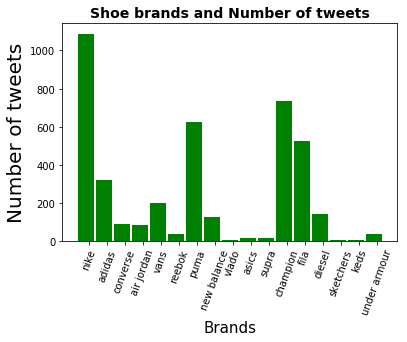

In [9]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

mydf = []

for brand in track:
        #print(brand)
        tweets[brand] = tweets['text'].apply(lambda tweet: word_in_text(brand, tweet))
        #print(tweets[brand])
        tweets_by_brand = tweets[brand].value_counts()[True]
        #print ('Num of matches',  tweets_by_brand)
        mydf.append(tweets_by_brand)

#print(list(zip(track, mydf)))
print(mydf)
x_pos = list(range(len(track)))
width = 0.9
fig, ax = plt.subplots()
plt.bar(x_pos, mydf, width, alpha=1, color='g')

# Setting axis labels and ticks
ax.set_xlabel('Brands', fontsize=15)
ax.set_ylabel('Number of tweets', fontsize=20)
ax.set_title('Shoe brands and Number of tweets', fontsize=14, fontweight='bold')
ax.set_xticks([p + 0.2 * width for p in x_pos])
ax.set_xticklabels(track)
plt.xticks(rotation=70)
plt.show()


### Analyze and display sources of the tweets

twittbot.net 300
Twitter for Android 2480
Twitter Web Client 1013
Twitter for iPhone 3551
Twitter for iPad 206
Twitter Lite 324


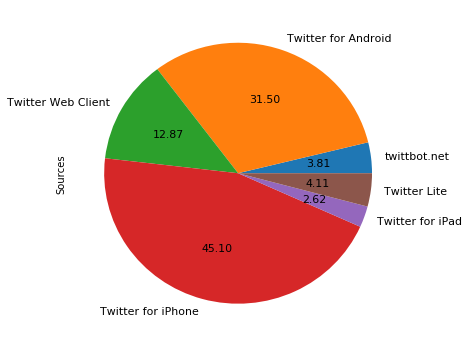

In [53]:
# Create a pie chart of sources:
#sources = tweets['source'].unique()
sources = []
percent = []
from collections import Counter
platforms = Counter(tweets['source'])
#print('Sources: {}'. format(platforms))
for key, values in platforms.items():
        if (values > 100):
            sources.append(key)
            percent.append(values)
            print(key, values)
# Pie chart:
pie_chart = pd.Series(percent, index=sources, name='Sources')
pie_chart.plot.pie(fontsize=11, autopct='%.2f', figsize=(6, 6));            